# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

***Описание данных***
<br>`children` — количество детей в семье</br>
<br>`days_employed` — общий трудовой стаж в днях</br>
<br>`dob_years` — возраст клиента в годах</br>
<br>`education` — уровень образования клиента</br>
<br>`education_id` — идентификатор уровня образования</br>
<br>`family_status` — семейное положение</br>
<br>`family_status_id` — идентификатор семейного положения</br>
<br>`gender` — пол клиента</br>
<br>`income_type` — тип занятости</br>
<br>`debt` — имел ли задолженность по возврату кредитов</br>
<br>`total_income` — ежемесячный доход</br>
<br>`purpose` — цель получения кредита</br>

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [24]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data_table_childe = pd.pivot_table(data,
                                   index = 'children',
                                   columns = 'debt',
                                   aggfunc = 'size',
                                   fill_value=0)
data_table_childe.columns = ['No debt', 'debt']
data_table_childe

,No debt,debt
children,,
0,13028,1063
1,4364,444
2,1858,194
3,303,27
4,37,4
5,9,0


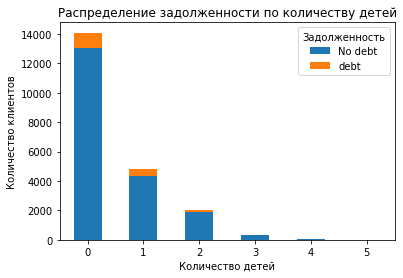

In [25]:
data_table_childe.plot(kind='bar', stacked=True)
plt.title('Распределение задолженности по количеству детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.legend(title='Задолженность')
plt.show()

In [26]:
# Расчет процентов задолженности
data_table_childe['Total'] = data_table_childe['No debt'] + data_table_childe['debt']
data_table_childe['debt %'] = (data_table_childe['debt'] / data_table_childe['Total']) * 100
data_table_childe

,No debt,debt,Total,debt %
children,,,,
0,13028,1063,14091,7.543822
1,4364,444,4808,9.234609
2,1858,194,2052,9.454191
3,303,27,330,8.181818
4,37,4,41,9.756098
5,9,0,9,0.000000


**Вывод:** Анализ сформированной таблицы и столбчатой диаграммы позволяет сделать вывод, что процент просрочки оплаты по кредиту больше у семей, в которых 3 (8.18%) и 4 ребенка (9.75%). Наименьший процент просрочки по кредиту у семей в которых 0 (7.54%) и 5 детей (0%), но стоит обратить внимание на то, что набор данных для семей состоящих из 5 детей маленький, из-за этого  возникает искажение результата. Из вышесказанного можно подтвердить гипотезу, что зависимость между количеством детей и возвратом кредита в срок подтверждается.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data_table_family_status = pd.pivot_table(data,
                                   index = 'family_status',
                                   columns = 'debt',
                                   aggfunc = 'size',
                                   fill_value=0)
data_table_family_status.columns = ['No debt', 'debt']
data_table_family_status

,No debt,debt
family_status,,
Не женат / не замужем,2523,273
в разводе,1105,84
вдовец / вдова,888,63
гражданский брак,3749,385
женат / замужем,11334,927


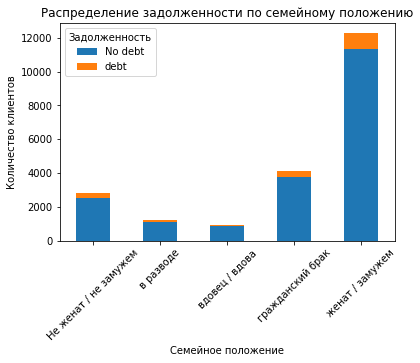

In [28]:
data_table_family_status.plot(kind='bar', stacked=True)
plt.title('Распределение задолженности по семейному положению')
plt.xlabel('Семейное положение')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.legend(title='Задолженность')
plt.show()

In [29]:
# Расчет процентов задолженности
data_table_family_status['Total'] = data_table_family_status['No debt'] + data_table_family_status['debt']
data_table_family_status['debt %'] = (data_table_family_status['debt'] / data_table_family_status['Total']) * 100
data_table_family_status

,No debt,debt,Total,debt %
family_status,,,,
Не женат / не замужем,2523,273,2796,9.763948
в разводе,1105,84,1189,7.064760
вдовец / вдова,888,63,951,6.624606
гражданский брак,3749,385,4134,9.313014
женат / замужем,11334,927,12261,7.560558


**Вывод:** Из полученной сводной таблицы и столбчатой диаграммы можно сделать вывод, что наибольшая процент просрочки оплаты по кредиту у `не женатых / не замужем` (9.76%) и у людей в `гражданском браке` (9.31%). Наименьший процент задолженности у `вдовец / вдова` (6.62%), `в разводе` (7.06%) и людей `женатых / замужних` (7.56). Существует зависимость между семейным положением и задолженностью по кредиту. Это может быть связано с финансовым положением или жизненными обстоятельствами, что требует более глубокого анализа. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [30]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [31]:
display(data['total_income'].max())
display(data['total_income'].median())
display(data['total_income'].min())

2265604

142594.0

20667

In [32]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
def income_level(row):
    total_income = row['total_income']
    
    if total_income <= 0:
        return 'Без дохода'
    elif total_income <= 45_000:
        return 'Очень низкий доход'
    elif total_income <= 75_000:
        return 'Низкий доход'
    elif total_income <= 145_000:
        return 'Средний доход'
    else:
        return 'Высокий доход'
    
data['calculation_income'] = data.apply(income_level, axis = 1)

In [33]:
data_table_income = pd.pivot_table(data,
                                   index = 'calculation_income',
                                   columns = 'debt',
                                   aggfunc = 'size',
                                   fill_value=0)
data_table_income.columns = ['No debt', 'debt']
data_table_income

,No debt,debt
calculation_income,,
Высокий доход,9465,799
Низкий доход,1516,122
Очень низкий доход,202,14
Средний доход,8416,797


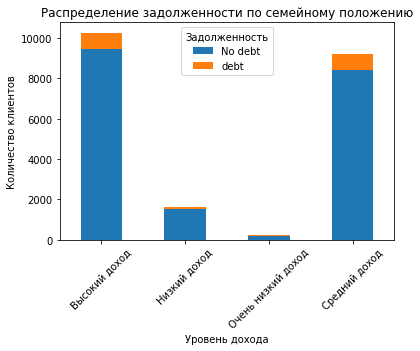

In [34]:
data_table_income.plot(kind='bar', stacked=True)
plt.title('Распределение задолженности по семейному положению')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.legend(title='Задолженность')
plt.show()

In [35]:
data_table_income['Total'] = data_table_income['No debt'] + data_table_income['debt']
data_table_income['debt %'] = (data_table_income['debt'] / data_table_income['Total']) * 100
data_table_income

,No debt,debt,Total,debt %
calculation_income,,,,
Высокий доход,9465,799,10264,7.784489
Низкий доход,1516,122,1638,7.448107
Очень низкий доход,202,14,216,6.481481
Средний доход,8416,797,9213,8.650819


**Вывод:** Анализ сформированной таблицы и столбчатой диаграммы позволяет сделать вывод, что процент просрочки оплаты по кредиту больше у клиентов с `Средний доход	`(8.65%) и `Высокий доход` (7.78%). Наименьший процент просрочки по кредиту у `Низкий доход` (7.44%) и `Очень низкий доход` (6.48%). Поскольку разница в проценте задолженности между категориями дохода не является сильно выраженной, можно сказать, что зависимость между уровнем дохода и возвратом кредита в срок не является очевидной в этом конкретном анализе.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [36]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data_table_purpose = pd.pivot_table(data,
                                   index = 'purpose_category',
                                   columns = 'debt',
                                   aggfunc = 'size',
                                   fill_value=0)
data_table_purpose.columns = ['No debt', 'debt']
data_table_purpose

,No debt,debt
purpose_category,,
операции с автомобилем,3879,400
операции с недвижимостью,9971,780
получение образования,3619,369
проведение свадьбы,2130,183


In [37]:
data_table_purpose['Total'] = data_table_purpose['No debt'] + data_table_purpose['debt']
data_table_purpose['debt %'] = (data_table_purpose['debt'] / data_table_purpose['Total']) * 100
data_table_purpose

,No debt,debt,Total,debt %
purpose_category,,,,
операции с автомобилем,3879,400,4279,9.347978
операции с недвижимостью,9971,780,10751,7.255139
получение образования,3619,369,3988,9.252758
проведение свадьбы,2130,183,2313,7.911803


**Вывод:** Из полученной сводной таблицы можно сделать вывод, что наибольшая процент просрочки оплаты по кредиту у клиентов с целью `операции с автомобилем	` (9.34%) и `получение образования` (9.25%). Наименьший процент задолженности у клиентов с целью `проведение свадьбы` (7.9%) и `операции с недвижимостью` (7.25%). Существует зависимость между целью получения кредита и задолженностью по кредиту. Это может быть связано с финансовым положением или жизненными обстоятельствами, что требует более глубокого анализа.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Причинами пропусков в исходных данных могут быть:
1. Невозможность их получения или обработки;
2. Искажение или скрытие информации;
3. Неисправности технического оборудования.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнить пропуски медианным значением лучше потому что, медианное значение более точно определяет середину выборки, чем среднее, поскольку устойчива к искажению. То есть одна половина не меньше его, а вторая не больше. Так как медианное значение определяет середину выборки - это лучшее решение для количественных переменных.

### Шаг 4: общий вывод.

В ходе исследования надежности заемщиков был предоставлен набор данных, содержащих следующие сущности:

<br>`children` — количество детей в семье</br>
<br>`days_employed` — общий трудовой стаж в днях</br>
<br>`dob_years` — возраст клиента в годах</br>
<br>`education` — уровень образования клиента</br>
<br>`education_id` — идентификатор уровня образования</br>
<br>`family_status` — семейное положение</br>
<br>`family_status_id` — идентификатор семейного положения</br>
<br>`gender` — пол клиента</br>
<br>`income_type` — тип занятости</br>
<br>`debt` — имел ли задолженность по возврату кредитов</br>
<br>`total_income` — ежемесячный доход</br>
<br>`purpose` — цель получения кредита</br>

   Первым этапом была проведена предобработка данных. В колонке `days_employed` и `total_income` были обнаружены пропущенные значения. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнили пропуски в столбце `total_income` медианным значением по каждому типу из столбца `income_type`. В колонке `days_employed` были обнаружены отрицательные значения, поэтому первоначально обработали их методом abs(), а потом по заполнили пропуски медианным значением по каждому типу из столбца `income_type`. Далее исследовали уникальные значения столбца `children` и обнаружили, что присутствуют аномальные значения -1 и 20. Приняли решение удалить аномальные значения из данных, так как невозможно из исходных данных провести замену.
   
   Был заменен вещественный тип данных в столбце `total_income` на целочисленный с помощью метода astype(). Обработаны неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Привели их к нижнему регистру. В датасете обнаружены строки-дубликаты (71) и удалены.
 
  Вторым этапом была произведена категоризация данных.
  На основании диапазонов, указанных ниже, создали в датафрейме `data` столбец `total_income_category` с категориями. 
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

Использовали собственную функцию с именем `categorize_income()` и метод `apply()`.

Создали функцию, которая на основании данных из столбца `purpose` формирует новый столбец `purpose_category`, в который входят следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Использовали собственную функцию с именем `categorize_purpose()` и метод `apply()`.


  Исследовали данные и сделали выводы, что 
  1. процент просрочки оплаты по кредиту больше у семей, в которых `3` (8.18%) и `4 ребенка` (9.75%). Наименьший процент просрочки по кредиту у семей в которых `0` (7.54%) и `5 детей` (0%), но стоит обратить внимание на то, что набор данных для семей состоящих из 5 детей маленький, из-за этого возникает искажение результата. Из вышесказанного можно подтвердить гипотезу, что зависимость между количеством детей и возвратом кредита в срок подтверждается.
  2. наибольшая процент просрочки оплаты по кредиту у `не женатых / не замужем` (9.76%) и у людей `в гражданском браке` (9.31%). Наименьший процент задолженности у `вдовец / вдова` (6.62%), в `разводе` (7.06%) и людей `женатых / замужних` (7.56). Существует зависимость между семейным положением и задолженностью по кредиту. Это может быть связано с финансовым положением или жизненными обстоятельствами, что требует более глубокого анализа.
  3.  процент просрочки оплаты по кредиту больше у клиентов с `Средний доход	`(8.65%) и `Высокий доход` (7.78%). Наименьший процент просрочки по кредиту у `Низкий доход` (7.44%) и `Очень низкий доход` (6.48%). Поскольку разница в проценте задолженности между категориями дохода не является сильно выраженной, можно сказать, что зависимость между уровнем дохода и возвратом кредита в срок не является очевидной в этом конкретном анализе.
  4. Из полученной сводной таблицы можно сделать вывод, что наибольшая процент просрочки оплаты по кредиту у клиентов с целью `операции с автомобилем` (9.34%) и `получение образования` (9.25%). Наименьший процент задолженности у клиентов с целью `проведение свадьбы` (7.9%) и `операции с недвижимостью` (7.25%). Существует зависимость между целью получения кредита и задолженностью по кредиту. Это может быть связано с финансовым положением или жизненными обстоятельствами, что требует более глубокого анализа.
  
  **Рекомендации**
  1. `Программы поддержки`: Внедрите программы поддержки для клиентов с высокими рисками задолженности, такие как финансовое консультирование или отсрочки платежей. Это может помочь снизить процент просроченных кредитов и улучшить финансовое состояние клиентов.
  2. `Улучшение оценки кредитоспособности`: Используйте более комплексные модели оценки кредитоспособности, которые включают анализ целей кредита, дохода и других факторов риска.